In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read data
telecom_data = pd.read_csv('E:\\learning\\PCA demo\\Assignment\\telecom_churn_data.csv', low_memory=False)

In [2]:
print('Dataframe Shape: ', telecom_data.shape)
print("Dataframe Info: "); telecom_data.info()
telecom_data.head(5)

Dataframe Shape:  (99999, 226)
Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


<b>Finding Null/Empty values count in columns<b>

In [3]:
null_columns=telecom_data.columns[telecom_data.isnull().any()]
telecom_data[null_columns].isnull().sum()

loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
loc_og_t2t_mou_7         3859
loc_og_t2t_mou_8         5378
loc_og_t2t_mou_9         7745
loc_og_t2m_mou_6         3937
loc_og_t2m_mou_7         3859
loc_og_t2m_mou_8         5378
loc_og_t2m_mou_9         7745
                        ...  
max_rech_data_8         73660
max_rech_data_9         74077
count_rech

<b> Finding unique value counts, to identify categorical columns </b>

In [11]:
telecom_data.loc[:,telecom_data.nunique() == 2].head(5)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


<b> Treating categorical data </b><br>
From the above we identified night_pck_user_6, night_pck_user_7, night_pck_user_8, night_pck_user_9, fb_user_6, fb_user_7, fb_user_8, fb_user_9, and around 65-70% null values present in them . 

In [12]:
#Adding '-99' to the missing NULL values, to later analyse missing categorical data.
cat_variables = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in cat_variables:
    telecom_data[var].fillna(value=-99, inplace=True)

In [13]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(telecom_data['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telecom_data['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telecom_data['night_pck_user_8'],prefix="night8",drop_first=True)
night_pck_user_9_s = pd.get_dummies(telecom_data['night_pck_user_9'],prefix="night9",drop_first=True)

fb_user_6_s = pd.get_dummies(telecom_data['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telecom_data['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telecom_data['fb_user_8'],prefix="fb8",drop_first=True)
fb_user_9_s = pd.get_dummies(telecom_data['fb_user_9'],prefix="fb9",drop_first=True)

telecom_data = pd.concat([telecom_data,night_pck_user_6_s],axis=1)
telecom_data = pd.concat([telecom_data,night_pck_user_7_s],axis=1)
telecom_data = pd.concat([telecom_data,night_pck_user_8_s],axis=1)
telecom_data = pd.concat([telecom_data,night_pck_user_9_s],axis=1)

telecom_data = pd.concat([telecom_data,fb_user_6_s],axis=1)
telecom_data = pd.concat([telecom_data,fb_user_7_s],axis=1)
telecom_data = pd.concat([telecom_data,fb_user_8_s],axis=1)
telecom_data = pd.concat([telecom_data,fb_user_9_s],axis=1)

# drop all categorial columns
telecom_data = telecom_data.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','night_pck_user_9'], 1)

<b>Looking at other columns with more than 70% missing data</b>

In [14]:
# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

We can Observe from the above, <br> missing values in total_rech_data, max_rech_data, count_rech_2g, av_rech_amt_data, arpu_3g for their respective months are equal to missing values in date_of_last_rech_data. <br> Since looks like no recharges were done during these months for the corresponding row, missing values can be imputed with 0.

In [15]:
fill_col = ['total_rech_data_6',
'total_rech_data_7',
'total_rech_data_8',
'total_rech_data_9',
'max_rech_data_6',
'max_rech_data_7',
'max_rech_data_8',
'max_rech_data_9',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_2g_8',
'count_rech_2g_9',
'count_rech_3g_6',
'count_rech_3g_7',
'count_rech_3g_8',
'count_rech_3g_9',
'av_rech_amt_data_6',
'av_rech_amt_data_7',
'av_rech_amt_data_8',
'av_rech_amt_data_9',
'arpu_3g_6',
'arpu_3g_7',
'arpu_3g_8',
'arpu_3g_9',
'arpu_2g_6',
'arpu_2g_7',
'arpu_2g_8',
'arpu_2g_9']
for col in fill_col:
    telecom_data[col].fillna(value=0, inplace=True)

In [16]:
#dropping date of last recharge column since we would not use it further
telecom_data=telecom_data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],1)

<b> Identifying high value customers </b> <br> Adding Total recharge data amount

In [18]:
telecom_data["total_rech_data_amt_6"] = telecom_data["total_rech_data_6"]*telecom_data['av_rech_amt_data_6']
telecom_data["total_rech_data_amt_7"] = telecom_data["total_rech_data_7"]*telecom_data['av_rech_amt_data_7']
telecom_data["total_rech_data_amt_8"] = telecom_data["total_rech_data_8"]*telecom_data['av_rech_amt_data_8']
telecom_data["total_rech_data_amt_9"] = telecom_data["total_rech_data_9"]*telecom_data['av_rech_amt_data_9']

#Dropping colums 
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom_data.drop(drop_data_columns, axis=1, inplace=True)

In [19]:
# Filter high-value customers
avg_rech_amt_6_7 = (telecom_data["total_rech_amt_6"] + telecom_data["total_rech_data_amt_6"] + 
                      telecom_data["total_rech_amt_7"] + telecom_data["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

telecom_data = telecom_data[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom_data.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 226)


<b> Identify churned member for month 9, and remove all the attributes corresponding to the churn phase</b>

In [20]:
#identifying churned members 
churn = telecom_data["total_ic_mou_9"] + telecom_data["total_og_mou_9"] + telecom_data["vol_2g_mb_9"] + telecom_data["vol_3g_mb_9"]

telecom_data["churn"] = np.where(churn, 0, 1)
drop_fourth_month_columns = [hdr for hdr in list(telecom_data) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
telecom_data.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telecom_data.shape)

Dataframe Shape:  (30001, 176)


In [21]:
100*(telecom_data.churn.sum()/len(telecom_data.index))

8.136395453484884

<b>We see that approx. 8.14% of high value customers have churned.</b>

In [22]:
telecom_data.nunique().sort_values(ascending=True)

std_ic_t2o_mou_7            1
std_og_t2c_mou_8            1
std_ic_t2o_mou_6            1
std_ic_t2o_mou_8            1
std_og_t2c_mou_7            1
last_date_of_month_8        1
std_og_t2c_mou_6            1
last_date_of_month_6        1
circle_id                   1
loc_og_t2o_mou              1
std_og_t2o_mou              1
loc_ic_t2o_mou              1
last_date_of_month_7        1
night6_0.0                  2
night6_1.0                  2
night7_0.0                  2
night7_1.0                  2
night8_0.0                  2
night9_0.0                  2
night9_1.0                  2
fb6_0.0                     2
fb7_0.0                     2
fb7_1.0                     2
fb8_0.0                     2
fb8_1.0                     2
fb9_0.0                     2
fb9_1.0                     2
night8_1.0                  2
fb6_1.0                     2
churn                       2
                        ...  
loc_ic_t2m_mou_8        15122
loc_og_t2m_mou_8        15130
loc_ic_t2m

<b>Dropping colums with no variance</b>

In [23]:
no_variance_col = ['std_ic_t2o_mou_7',
'std_og_t2c_mou_8',
'std_ic_t2o_mou_6',
'std_ic_t2o_mou_8',
'std_og_t2c_mou_7',
'std_og_t2c_mou_6',
'circle_id',
'loc_og_t2o_mou',
'std_og_t2o_mou',
'loc_ic_t2o_mou',
'last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8']
telecom_data = telecom_data.drop(no_variance_col,1)
print('Dataframe Shape: ', telecom_data.shape)
print("Dataframe Info: "); telecom_data.info()

Dataframe Shape:  (30001, 163)
Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 163 entries, mobile_number to churn
dtypes: float64(117), int32(1), int64(26), object(3), uint8(16)
memory usage: 34.2+ MB


In [24]:
# Columns with more than 50% missing values
colmns_missing_data = round(100*(telecom_data.isnull().sum()/len(telecom_data.index)), 2)
colmns_missing_data[colmns_missing_data >= 50]

Series([], dtype: float64)

In [25]:
#removing some of the columns that might not make a substantial impact on the model, since we already have total recharge amount per month
cols_to_drop=['max_rech_data_6',
'max_rech_data_7',
'max_rech_data_8',
'count_rech_2g_6',
'count_rech_2g_7',
'count_rech_2g_8',
'count_rech_3g_6',
'count_rech_3g_7',
'count_rech_3g_8',
'arpu_3g_6',
'arpu_3g_7',
'arpu_3g_8',
'arpu_2g_6',
'arpu_2g_7',
'arpu_2g_8']
telecom_data = telecom_data.drop(cols_to_drop,1)
print('Dataframe Shape: ', telecom_data.shape)
print("Dataframe Info: "); telecom_data.info()

Dataframe Shape:  (30001, 148)
Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 148 entries, mobile_number to churn
dtypes: float64(102), int32(1), int64(26), object(3), uint8(16)
memory usage: 30.8+ MB


<b> Treating row wise missing values </b>

In [26]:
# drop rows with missing values greater >= 25
telecom_data = telecom_data[telecom_data.isnull().sum(axis=1) < 25]
print('Dataframe Shape: ', telecom_data.shape)
print("Dataframe Info: "); telecom_data.info()

Dataframe Shape:  (28504, 148)
Dataframe Info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 148 entries, mobile_number to churn
dtypes: float64(102), int32(1), int64(26), object(3), uint8(16)
memory usage: 29.2+ MB


In [27]:
null_columns=telecom_data.columns[telecom_data.isnull().any()]
telecom_data[null_columns].isnull().sum()

date_of_last_rech_6     33
date_of_last_rech_7     52
date_of_last_rech_8    276
dtype: int64

<b> Handling datetime columns </b>

In [28]:
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
for col in date_vars:
    telecom_data[col] = pd.to_datetime(telecom_data[col])
telecom_data[date_vars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
date_of_last_rech_6    28471 non-null datetime64[ns]
date_of_last_rech_7    28452 non-null datetime64[ns]
date_of_last_rech_8    28228 non-null datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB


In [29]:
#creating new colums of recharge days remaining
import datetime
telecom_data['rech_days_remaining_6']=(datetime.datetime.strptime("30-06-2014", "%d-%m-%Y") - telecom_data.date_of_last_rech_6).astype('timedelta64[D]')
telecom_data['rech_days_remaining_7']=(datetime.datetime.strptime("31-07-2014", "%d-%m-%Y") - telecom_data.date_of_last_rech_7).astype('timedelta64[D]')
telecom_data['rech_days_remaining_8']=(datetime.datetime.strptime("31-08-2014", "%d-%m-%Y") - telecom_data.date_of_last_rech_8).astype('timedelta64[D]')

In [30]:
#dropping earlier datetime columns from the data set
telecom_data.drop(date_vars, axis=1, inplace=True)
telecom_data.shape

(28504, 148)

In [31]:
new_date_col = ['rech_days_remaining_6','rech_days_remaining_7','rech_days_remaining_8']
telecom_data[new_date_col].describe()

,rech_days_remaining_6,rech_days_remaining_7,rech_days_remaining_8
count,28471.000000,28452.000000,28228.000000
mean,3.388044,3.486504,4.147478
std,4.490864,4.289200,5.104752
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,2.000000,3.000000
75%,4.000000,5.000000,6.000000
max,29.000000,30.000000,30.000000


In [32]:
#imputing missing data in new_date_col with median
for col in new_date_col:
    telecom_data[col].fillna(telecom_data[col].median(),inplace=True)

<b> Check for outliers on Usage (voice and data) based columns </b><br>
Using upper quantile as 0.95 and lower as 0.5

In [33]:
telecom_data['v_d_usage_6'] = telecom_data["total_ic_mou_6"] + telecom_data["total_og_mou_6"] + telecom_data["vol_2g_mb_6"] + telecom_data["vol_3g_mb_6"]
telecom_data['v_d_usage_7'] = telecom_data["total_ic_mou_7"] + telecom_data["total_og_mou_7"] + telecom_data["vol_2g_mb_7"] + telecom_data["vol_3g_mb_7"]
telecom_data['v_d_usage_8'] = telecom_data["total_ic_mou_8"] + telecom_data["total_og_mou_8"] + telecom_data["vol_2g_mb_8"] + telecom_data["vol_3g_mb_8"]
#cols=['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','vol_2g_mb_6',
#      'vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
cols=['v_d_usage_6','v_d_usage_7','v_d_usage_8']
low = .05
high = .95
quant_df = telecom_data[cols].quantile([low, high])
print(quant_df)
telecom_data[cols].describe(percentiles=[.25,.5,.75,.90,.95])

      v_d_usage_6  v_d_usage_7  v_d_usage_8
0.05      205.901     267.1065      66.5220
0.95     3269.608    3429.4805    3367.0245


,v_d_usage_6,v_d_usage_7,v_d_usage_8
count,28504.000000,28504.000000,28504.000000
mean,1370.333973,1441.479117,1324.441629
std,1116.179060,1153.227149,1200.197744
min,0.000000,0.000000,0.000000
25%,700.397500,749.135000,593.600000
50%,1123.465000,1172.960000,1062.730000
75%,1741.192500,1818.267500,1719.872500
90%,2578.817000,2686.877000,2625.537000
95%,3269.608000,3429.480500,3367.024500
max,26862.910000,28775.020000,29663.390000


In [34]:
#Removing Rows having outliers
telecom_data=telecom_data[telecom_data.v_d_usage_8 < telecom_data.v_d_usage_8.quantile(.95)]
#telecom_data.drop(date_vars, axis=1, inplace=True)
telecom_data.shape

(27078, 151)

In [35]:
cols=['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','vol_2g_mb_6',
      'vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']

low = .05
high = .95
quant_df = telecom_data[cols].quantile([low, high])
print(quant_df)
telecom_data[cols].describe(percentiles=[.25,.5,.75,.90,.95])

      total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  total_og_mou_6  \
0.05          8.5100         12.1100          2.5885           1.710   
0.95        872.8825        885.1005        861.0205        1797.275   

      total_og_mou_7  total_og_mou_8  vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8  \
0.05          1.9100          0.0000       0.0000        0.000        0.000   
0.95       1832.9645       1658.5505     685.1795      681.847      604.716   

      vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  
0.05        0.000        0.000        0.000  
0.95     1419.534     1495.739     1350.297  


,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000,27078.000000
mean,283.386076,290.102529,271.614672,593.231195,606.740066,518.376511,122.501948,121.942888,100.462912,271.452338,291.593132,248.094861
std,325.950794,327.623026,301.347818,625.355877,628.630301,550.513430,308.016131,306.838890,265.484728,629.327805,627.745146,494.858551
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.550000,86.732500,73.010000,132.210000,133.132500,94.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,187.890000,192.645000,180.985000,418.750000,435.100000,347.250000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
75%,369.067500,375.455000,360.255000,846.547500,876.987500,761.417500,80.987500,77.760000,51.920000,282.630000,346.440000,283.057500
90%,644.523000,652.775000,628.341000,1385.158000,1410.355000,1275.061000,402.674000,399.191000,320.595000,958.070000,1021.283000,943.894000
95%,872.882500,885.100500,861.020500,1797.275000,1832.964500,1658.550500,685.179500,681.847000,604.716000,1419.534000,1495.739000,1350.297000
max,7074.590000,4972.530000,3086.930000,8488.360000,7422.630000,3264.740000,6207.840000,4909.710000,3193.180000,20304.270000,13983.310000,3313.350000


***EDA:***
<br/>
<br/>
***Univariate Analysis*** 
<br/>
**create plots to compare variable distribution across months 6,7 and 8 for churn and non-churn customers**

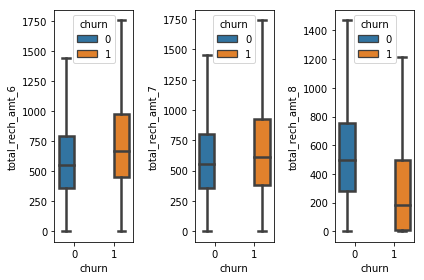

In [38]:
f,axes = plt.subplots(nrows=1, ncols=3)
#Analysis of total_rech_amt
sns.boxplot(data=telecom_data, y="total_rech_amt_6", x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
sns.boxplot(data=telecom_data, y="total_rech_amt_7",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
sns.boxplot(data=telecom_data, y="total_rech_amt_8",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])

f.tight_layout()

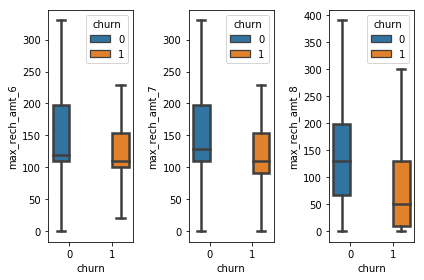

In [39]:
#Analysis of max_rech_amt

f,axes = plt.subplots(nrows=1, ncols=3)
sns.boxplot(data=telecom_data, y="max_rech_amt_6", x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
sns.boxplot(data=telecom_data, y="max_rech_amt_7",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
sns.boxplot(data=telecom_data, y="max_rech_amt_8",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
f.tight_layout()

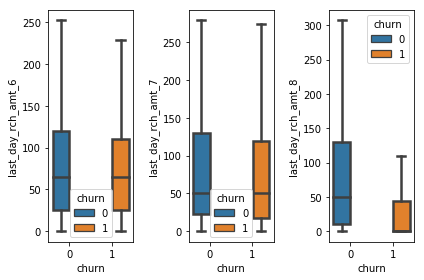

In [40]:
f,axes = plt.subplots(nrows=1, ncols=3)
sns.boxplot(data=telecom_data, y="last_day_rch_amt_6", x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
sns.boxplot(data=telecom_data, y="last_day_rch_amt_7",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
sns.boxplot(data=telecom_data, y="last_day_rch_amt_8",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
f.tight_layout()

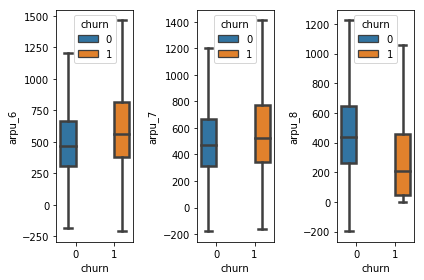

In [41]:
f,axes = plt.subplots(nrows=1, ncols=3)
sns.boxplot(data=telecom_data, y="arpu_6", x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
sns.boxplot(data=telecom_data, y="arpu_7",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
sns.boxplot(data=telecom_data, y="arpu_8",  x="churn",hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
f.tight_layout()

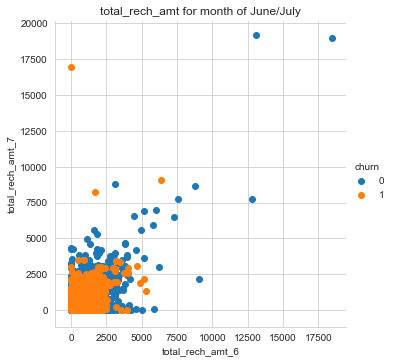

In [45]:
sns.set_style('whitegrid')
g=sns.FacetGrid(telecom_data,hue='churn',height=5)
g= g.map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()
for ax, title in zip(g.axes.flat,['total_rech_amt for month of June/July']):
    ax.set_title(title)

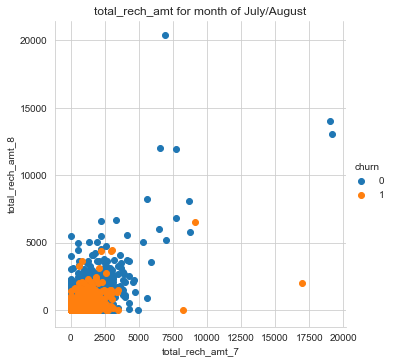

In [46]:
g=sns.FacetGrid(telecom_data,hue='churn',height=5)
g= g.map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()
for ax, title in zip(g.axes.flat,['total_rech_amt for month of July/August']):
    ax.set_title(title)

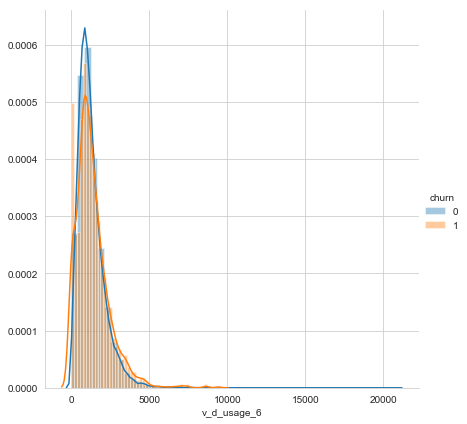

In [47]:
sns.FacetGrid(telecom_data,hue='churn',height=6).map(sns.distplot,'v_d_usage_6').add_legend()

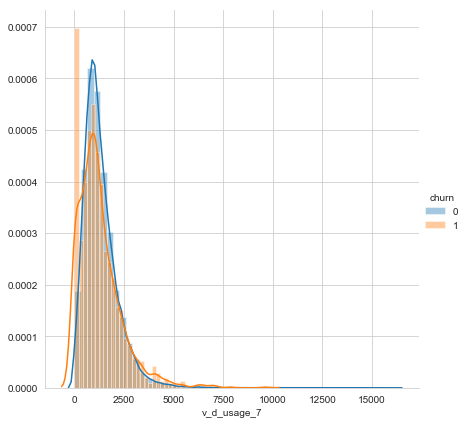

In [48]:
sns.FacetGrid(telecom_data,hue='churn',height=6).map(sns.distplot,'v_d_usage_7').add_legend()

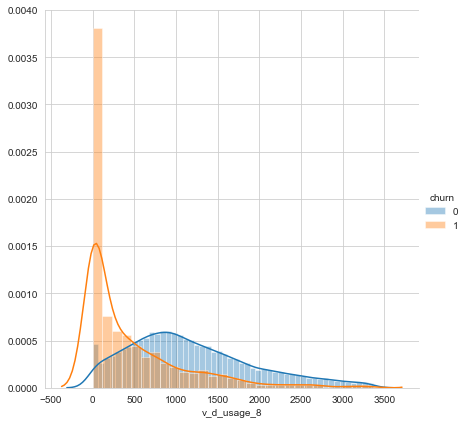

In [49]:
sns.FacetGrid(telecom_data,hue='churn',height=6).map(sns.distplot,'v_d_usage_8').add_legend()

<b>From the sub-plot  we can observe average usage/revenue per user drops signficantly in action phase for churned customers</b>

In [54]:
telecom_data = telecom_data.drop(['v_d_usage_6','v_d_usage_7','v_d_usage_8'],1)
telecom_data.shape

(27078, 148)

***Correlation Matrix***

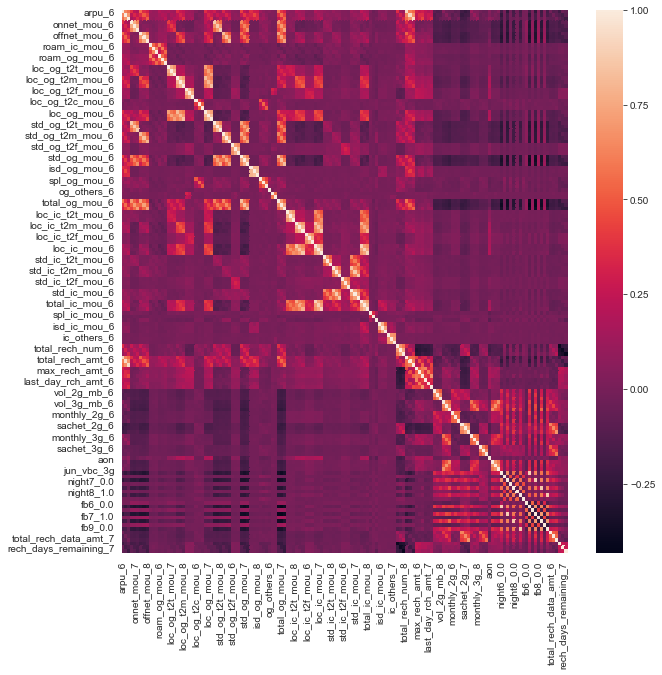

In [55]:
telecom_corr_mtrx = telecom_data.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (10,10))
sns.heatmap(telecom_corr_mtrx.corr(), annot= False)

In [56]:
#checking the balance of the data
churn  = telecom_data["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Customer    = {}".format(churn[1]))
print("Total Not-Churn Customer = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Customer    = 1576
Total Not-Churn Customer = 25502
Churn Rate            = 5.82%


<b>Data is highly imbalanced, we need to balance it before we can create the model.</b>

In [57]:
telecom_data_copy= telecom_data.copy()

<b> Building Predictive Models </b><br>
Model 1: PCA + Logistic Regression

In [58]:
#Dropping mobile number col
telecom_data.drop('mobile_number', axis=1, inplace=True)
X = telecom_data.drop(['churn'],axis=1)
y = telecom_data['churn']

Scaling and normalizing

In [59]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)

Split data 70/30 into train/test

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=42)

Balancing the class with SMOTE

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_train,y_train = sm.fit_sample(X_train,y_train)
X_train.shape

(35680, 146)

Applying PCA

In [64]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [65]:
pca_train_df = pca.fit_transform(X_train)
pca_train_df.shape

(35680, 146)

In [66]:
pca_test_df = pca.transform(X_test)
pca_test_df.shape

(8124, 146)

Logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(pca_train_df, y_train)

# Predicted probabilities
y_pred = logsk.predict(pca_test_df)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

c:\users\shreyash\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test,y_pred)

array([[6502, 1160],
       [  68,  394]], dtype=int64)

In [76]:
print ("Accuracy score:")
accuracy_score(y_test,y_pred)

Accuracy score:


0.8488429345150172

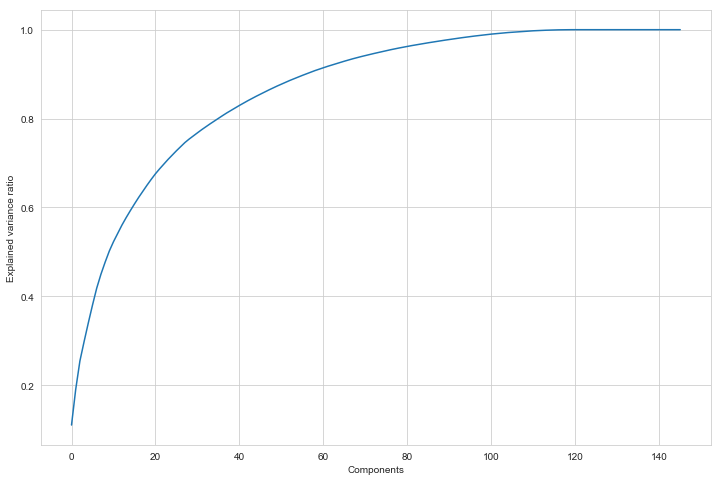

In [77]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Explained variance ratio')
plt.show()

60 components explain around 90% of variance

In [78]:
pca_60 = PCA(n_components=60)
df_train_pca_60 = pca_60.fit_transform(X_train)
print(df_train_pca_60.shape)
df_test_pca_60 = pca_60.transform(X_test)
print(df_test_pca_60.shape)

(35680, 60)
(8124, 60)


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca_60, y_train)

# Predicted probabilities
y_pred60 = logsk1.predict(df_test_pca_60)
y_pred_df = pd.DataFrame(y_pred60)

c:\users\shreyash\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
confusion_matrix(y_test,y_pred60)

array([[6461, 1201],
       [  68,  394]], dtype=int64)

In [81]:
print ("Accuracy score:")
accuracy_score(y_test,y_pred60)

Accuracy score:


0.8437961595273265

In [82]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(15)

,PC1,PC2,PC3,Feature
0,0.156815,0.091910,0.061788,arpu_6
1,0.157665,0.131490,0.055568,arpu_7
2,0.083623,0.171444,0.081186,arpu_8
3,0.173817,-0.062679,-0.049348,onnet_mou_6
4,0.170675,-0.036288,-0.051367,onnet_mou_7
5,0.108507,0.020733,-0.021260,onnet_mou_8
6,0.187488,0.038458,-0.017259,offnet_mou_6
7,0.191596,0.057570,-0.020284,offnet_mou_7
8,0.102346,0.105797,0.003442,offnet_mou_8
9,0.022116,0.030176,0.307700,roam_ic_mou_6


<b>Observations</b><br>
1. Logistic Regression on balanced class with smote over PCA, gives the accuracy of around 84.3%<br>
2. 90% of variance can be explained with 60 columns
3. Key features noted are arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7,roam_ic_mou_8

<b> Building Predictive Models </b><br>
Model 2 : Lasso + decision trees

In [83]:
telecom_df = telecom_data_copy.copy()

In [84]:
#Dropping mobile number col
telecom_df.drop('mobile_number', axis=1, inplace=True)
X = telecom_df.drop(['churn'],axis=1)
y = telecom_df['churn']
telecom_df.shape

(27078, 147)

Scaling and Normalizing

In [85]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)

Splitting train/test data

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=42)

Balancing with smote

In [87]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_train,y_train = sm.fit_sample(X_train,y_train)
X_train.shape

(35680, 146)

Lasso for feature reduction

In [88]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
supported_cols = model.get_support(indices=True)
print(lsvc.coef_)
print(lsvc.intercept_)

[[ 0.0056969   0.0358843   0.          0.01700858  0.          0.
   0.          0.         -0.04054437  0.          0.01624982  0.00814838
   0.          0.02866781  0.03754803  0.          0.          0.
   0.          0.         -0.07358497  0.          0.          0.
   0.          0.          0.          0.          0.         -0.02831879
   0.          0.          0.          0.          0.00698966  0.
   0.          0.          0.          0.03087417  0.          0.
   0.          0.          0.          0.          0.         -0.01989583
   0.          0.00128036  0.          0.01496598  0.06897952 -0.23328189
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.08025415
   0.01793767  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.00257407  0.02109539 -0.19497558  0.          0.         -0.02928355
   0.          0.          0

In [89]:
#printing supported columns
list(telecom_df.columns[supported_cols])

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_6',
 'spl_og_mou_8',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_3g_mb_8',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_3g_7',
 'aon',
 'night7_0.0',
 'night9_0.0',
 'fb6_1.0',
 'fb7_1.0',
 'fb9_1.0',
 'churn',
 'rech_days_remaining_6',
 'rech_days_remaining_7']

In [93]:
X_train = X_lasso
X_train.shape
#Feature space holds 35680 observations and 36 features

(35680, 38)

Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree= DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test = pd.DataFrame(data=X_test).loc[:, supported_cols]
y_pred_default = decision_tree.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      7662
           1       0.26      0.80      0.40       462

    accuracy                           0.86      8124
   macro avg       0.62      0.83      0.66      8124
weighted avg       0.95      0.86      0.89      8124



In [97]:
confusion_matrix(y_test,y_pred_default)

array([[6628, 1034],
       [  92,  370]], dtype=int64)

In [98]:
accuracy_score(y_test,y_pred_default)

0.861398325947809

Trying with max depth as 10

In [99]:
decision_tree= DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test = pd.DataFrame(data=X_test).loc[:, supported_cols]
y_pred_default = decision_tree.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7662
           1       0.35      0.73      0.47       462

    accuracy                           0.91      8124
   macro avg       0.66      0.82      0.71      8124
weighted avg       0.95      0.91      0.92      8124



In [102]:
confusion_matrix(y_test,y_pred_default)

array([[7027,  635],
       [ 126,  336]], dtype=int64)

In [103]:
accuracy_score(y_test,y_pred_default)

0.9063269325455441

<b> Observations (using default parameters for Decision trees)</b><br>
1. Features identified by Lasso are 
    ['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_6',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_3g_7',
 'aon',
 'night7_0.0',
 'night9_0.0',
 'fb6_1.0',
 'fb7_1.0',
 'fb9_1.0',
 'churn',
 'rech_days_remaining_6',
 'rech_days_remaining_7']
<br>
2. The accuracy is around 86% with max depth as 5. <br>
3. The accuracy of model is around 90% with max depth as 10.

<b> Building Predictive Models </b><br>
Model 3 : Lasso + Random Forest

In [105]:
telecom_rm = telecom_data_copy.copy()

In [106]:
#Dropping mobile number col
telecom_rm.drop('mobile_number', axis=1, inplace=True)
X = telecom_rm.drop(['churn'],axis=1)
y = telecom_rm['churn']
telecom_rm.shape

(27078, 147)

Scaling and Normalization

In [107]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)

Splitting data

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.7,test_size=0.3,random_state=42)

Balancing with SMOTE

In [109]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_train,y_train = sm.fit_sample(X_train,y_train)
X_train.shape

(35680, 146)

Lasso feature selection

In [110]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_train)
supported_cols = model.get_support(indices=True)
print(lsvc.coef_)
print(lsvc.intercept_)

[[ 0.00318619  0.03696271  0.          0.0243182   0.          0.
   0.          0.         -0.0329979   0.          0.01474601  0.0068756
   0.          0.02986168  0.03296496  0.          0.          0.
   0.          0.         -0.08366042  0.          0.         -0.00468009
   0.          0.          0.          0.          0.         -0.03722303
   0.          0.          0.          0.          0.0156846   0.
   0.          0.          0.          0.02602666  0.          0.
   0.          0.          0.          0.          0.         -0.01785094
   0.          0.00295196  0.          0.01571922  0.06590738 -0.24086374
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.07629087
   0.01742569  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.00767542  0.02113537 -0.20436372  0.          0.         -0.01696134
   0.          0.    

In [111]:
#printing supported columns
list(telecom_df.columns[supported_cols])

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_6',
 'spl_og_mou_8',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'vol_3g_mb_8',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_3g_7',
 'aon',
 'night7_0.0',
 'night9_0.0',
 'night9_1.0',
 'fb6_1.0',
 'fb7_1.0',
 'fb9_1.0',
 'churn',
 'rech_days_remaining_6',
 'rech_days_remaining_7']

In [112]:
X_train = X_lasso
X_train.shape

(35680, 41)

Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

c:\users\shreyash\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
X_test = pd.DataFrame(data=X_test).loc[:, supported_cols]

predictions = rfc.predict(X_test)

In [115]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7662
           1       0.48      0.60      0.53       462

    accuracy                           0.94      8124
   macro avg       0.73      0.78      0.75      8124
weighted avg       0.95      0.94      0.94      8124



In [116]:
print(confusion_matrix(y_test, predictions))

[[7360  302]
 [ 186  276]]


In [117]:
accuracy_score(y_test, predictions)

0.9399310684391925

<b> Observations (using default parameters for Random Forest)</b><br>
1. Features identified by Lasso are 
    ['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_7',
 'std_og_mou_6',
 'spl_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_3g_7',
 'aon',
 'night7_0.0',
 'night9_0.0',
 'fb6_1.0',
 'fb7_1.0',
 'fb9_1.0',
 'churn',
 'rech_days_remaining_6',
 'rech_days_remaining_7']
<br>
2. The accuracy is around 94%. <br>
